In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/flipr-hiring-challenge/Train_dataset.xlsx
/kaggle/input/flipr-hiring-challenge/Test_dataset.xlsx
/kaggle/input/flipr-hiring-challenge/Variable_Description.xlsx
/kaggle/input/flipr-hiring-challenge/Hackathon_4.0_ML_Guidelines.pdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_excel('../input/flipr-hiring-challenge/Train_dataset.xlsx')
df_test = pd.read_excel('../input/flipr-hiring-challenge/Test_dataset.xlsx')
df_train.head(14)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
5,6,Bhubaneshwar,Female,Mrs,sandhya,YES,1.0,Clerk,Public,2,...,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345
6,7,Bhubaneshwar,Female,Mrs,iqra,YES,2.0,Manufacturing,Car,2,...,156.0,311.0,99.0,68.0,23,5,4000000.0,1600000,1.0,49.670361
7,8,Bhubaneshwar,Female,Mrs,renu @ rinki,YES,1.0,Manufacturing,Public,2,...,179.0,242.0,82.0,59.0,34,3,4100000.0,1200000,0.0,49.121025
8,9,Bhubaneshwar,Female,Mrs,kalyani patro,YES,2.0,Sales,Public,2,...,156.0,NaN,NaN,37.0,21,7,4500000.0,900000,0.0,48.531922
9,10,Bhubaneshwar,Female,Mrs,gurdeep kaur,YES,1.0,Farmer,Public,2,...,178.0,277.0,83.0,58.0,28,4,2200000.0,1400000,2.0,48.475097


In [4]:
df_train.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [6]:
df_train.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [7]:
for col in df_train.columns:
    print("col-name: ", col, " | no_of_unique_values: ", df_train[col].nunique(dropna=True))

col-name:  people_ID  | no_of_unique_values:  10714
col-name:  Region  | no_of_unique_values:  5
col-name:  Gender  | no_of_unique_values:  2
col-name:  Designation  | no_of_unique_values:  2
col-name:  Name  | no_of_unique_values:  6304
col-name:  Married  | no_of_unique_values:  2
col-name:  Children  | no_of_unique_values:  3
col-name:  Occupation  | no_of_unique_values:  9
col-name:  Mode_transport  | no_of_unique_values:  3
col-name:  cases/1M  | no_of_unique_values:  4
col-name:  Deaths/1M  | no_of_unique_values:  3
col-name:  comorbidity  | no_of_unique_values:  4
col-name:  Age  | no_of_unique_values:  53
col-name:  Coma score  | no_of_unique_values:  13
col-name:  Pulmonary score  | no_of_unique_values:  4
col-name:  cardiological pressure  | no_of_unique_values:  4
col-name:  Diuresis  | no_of_unique_values:  341
col-name:  Platelets  | no_of_unique_values:  146
col-name:  HBB  | no_of_unique_values:  191
col-name:  d-dimer  | no_of_unique_values:  151
col-name:  Heart rate  

There are many columns having empty values, so we will impute them accordingly. These columns are - name, children, occupation, mode_transport, comorbidity, cardiological pressure, Diuresis, Platelets, HBB, d-dimer, Heart rate, HDL_cholesterol, Insurance, FT/month

But first lets drop some unneccessary columns that we know will not contribute to our model selection like name, etc. The followings columns are removed: name, designation because irrespective of the values, it just cannot decide the infection probability

In [8]:
df_train = df_train.drop(['Designation', 'Name'], axis = 1)
df_train.head(10)

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
5,6,Bhubaneshwar,Female,YES,1.0,Clerk,Public,2,0,None,...,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345
6,7,Bhubaneshwar,Female,YES,2.0,Manufacturing,Car,2,0,Coronary Heart Disease,...,156.0,311.0,99.0,68.0,23,5,4000000.0,1600000,1.0,49.670361
7,8,Bhubaneshwar,Female,YES,1.0,Manufacturing,Public,2,0,Diabetes,...,179.0,242.0,82.0,59.0,34,3,4100000.0,1200000,0.0,49.121025
8,9,Bhubaneshwar,Female,YES,2.0,Sales,Public,2,0,Hypertension,...,156.0,NaN,NaN,37.0,21,7,4500000.0,900000,0.0,48.531922
9,10,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,None,...,178.0,277.0,83.0,58.0,28,4,2200000.0,1400000,2.0,48.475097


In [9]:
# import pandas_profiling
# df_train.profile_report()

In [10]:
df_train.Infect_Prob[(df_train['Infect_Prob']>45.0) & (df_train['Infect_Prob']<55.0)].count()

8140

80% of probability resides between 45 and 55 probability

## Encoding non-null categorical features before imputation

For gender, married and region- gender and married have binary values, we will encode with LabelEncoder, while one-hot encoding for region

In [11]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

lb = LabelBinarizer()
df_train['Gender'] = lb.fit_transform(df_train.Gender)
df_train['Married'] = lb.fit_transform(df_train.Married)


df_train.head(5)

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,0,1,1.0,Farmer,Public,2,0,Hypertension,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,0,1,2.0,Farmer,Walk,2,0,Diabetes,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,0,0,1.0,Cleaner,Public,2,0,None,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,0,1,1.0,Driver,Car,2,0,Coronary Heart Disease,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,0,0,2.0,Manufacturing,Car,2,0,Diabetes,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


## Imputing missing values

Now, we have to impute the missing values in several columns.

The method of imputation will vary according to the feature. So we need to visualize how the 

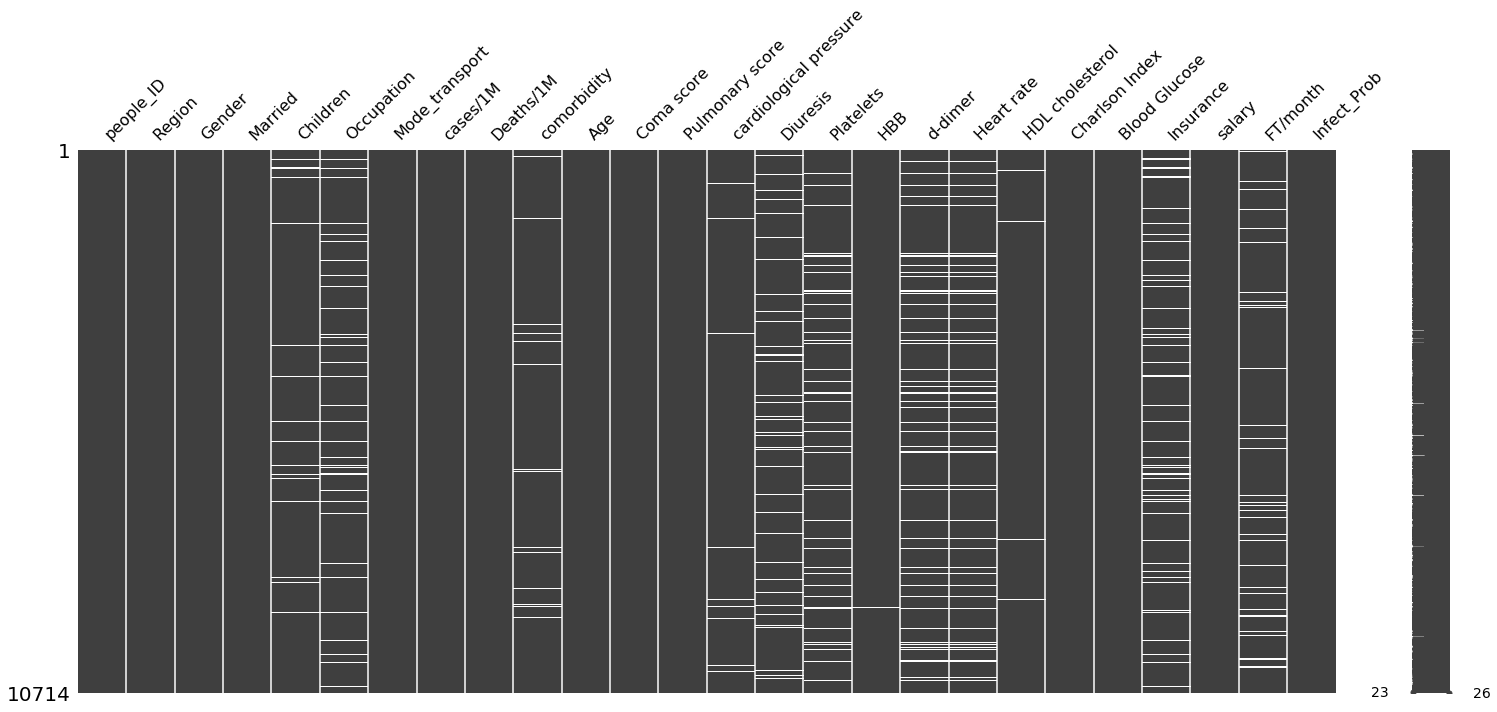

In [12]:
import missingno as msno
msno.matrix(df_train)

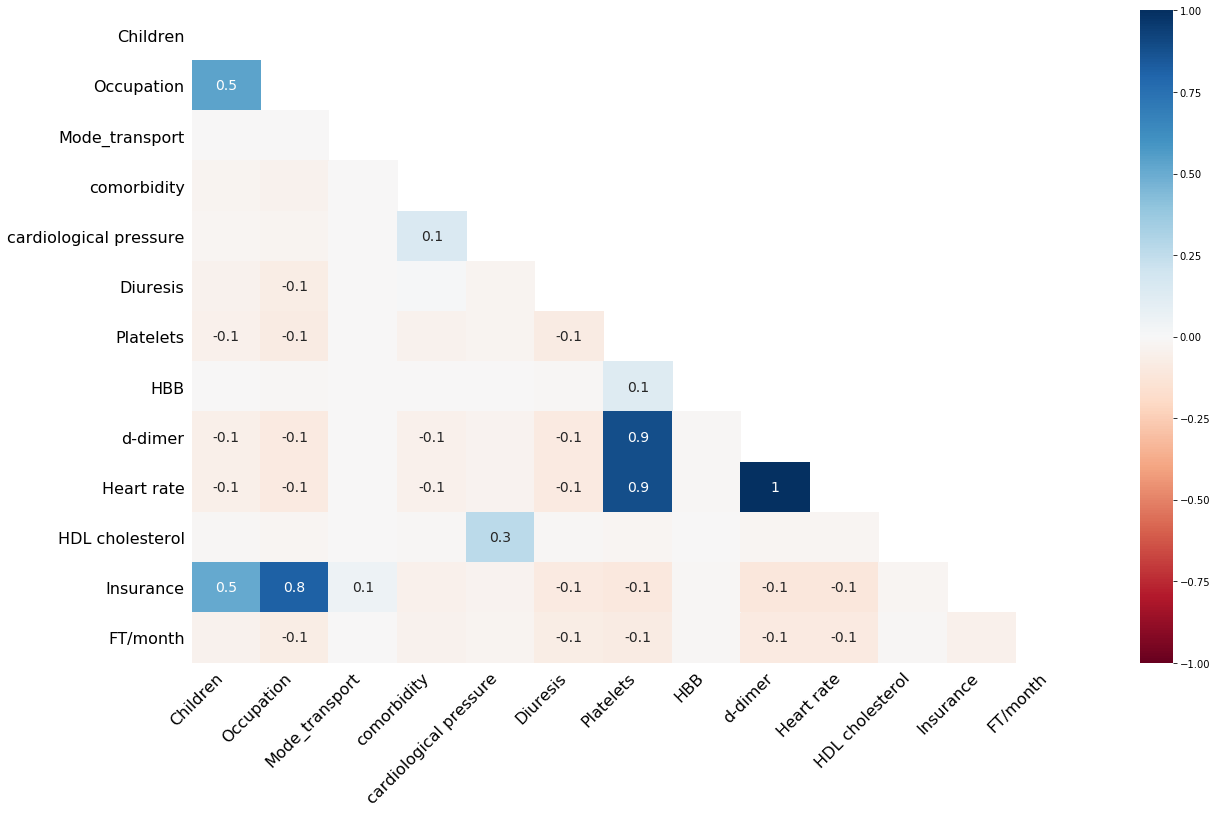

In [13]:
msno.heatmap(df_train)

This is map showing nullity correlation:

It can be seen that individuals having children have some affinity towards having an insurance and have an occupation.
There is high relation between d-dimer and heart-rate, and also platelets and d-dimer | heart-rate.

So, we will use certain viz for imputations

### Imputing feature 'children'

In [14]:
df_train.Children.isna().sum()

311

In [15]:
df_train.Married[(df_train['Married']==0.0) & (df_train['Children'].isna()==1)].count()

311

It means that there is no row such that married column is 1 for missing values of Children. Therefore we can atleast place value in children as 0 for the individuals who are no married 

In [16]:
def impute_children(cols):
    children = cols[0]
    married = cols[1]
    
    if np.isnan(children):
        if married == 0.0:
            return 0
        else:
            return children
    else:
        return children

df_train['Children'] = df_train[['Children', 'Married']].apply(impute_children, axis=1)          
    

In [17]:
df_train.Children.isna().sum()

0

### Imputing feature 'Occupation'

In [18]:
df_train.salary[df_train['Occupation'].isna()].head()

12    2300000
21    1400000
37    1200000
51    1300000
66     700000
Name: salary, dtype: int64

So there are persons whose occupation is not known but salary is non-empty.

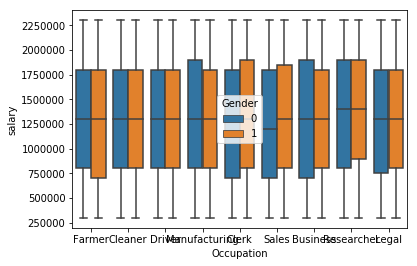

In [19]:
sns.boxplot(x = "Occupation", y = "salary", hue='Gender', data = df_train)

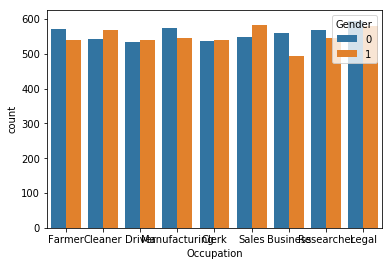

In [20]:
sns.countplot(x = "Occupation", hue = "Gender", data = df_train)

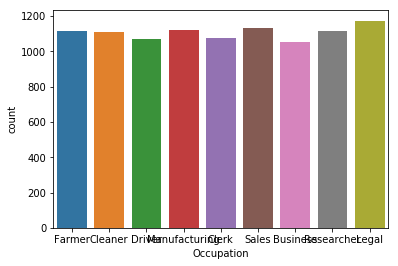

In [21]:
sns.countplot(x = "Occupation", data = df_train)

All Occupations have moraless equal number of males and females.
Encoding the occupation feature.

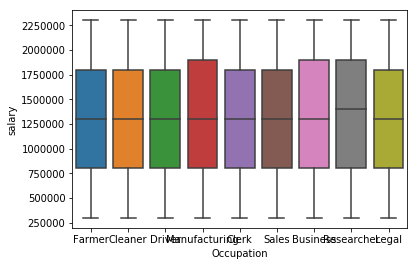

In [22]:
sns.boxplot(x='Occupation', y='salary', data=df_train)

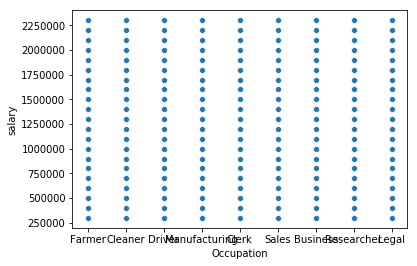

In [23]:
sns.scatterplot(x='Occupation', y='salary', data=df_train)

All occupations have same range of income

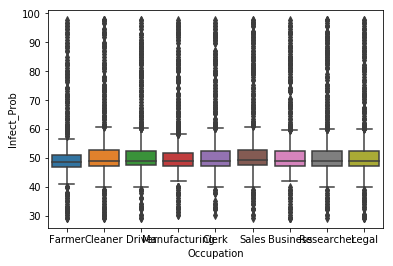

In [24]:
sns.boxplot(x='Occupation', y='Infect_Prob', data=df_train)

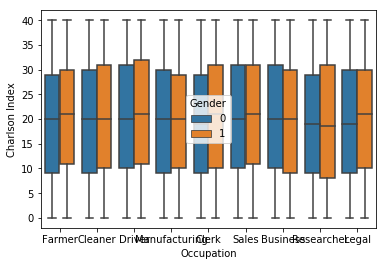

In [25]:
sns.boxplot(x='Occupation', y='Charlson Index',hue='Gender', data=df_train)

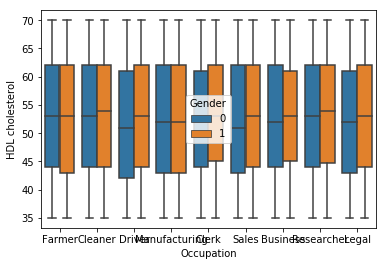

In [26]:
sns.boxplot(x='Occupation', y='HDL cholesterol',hue='Gender', data=df_train)

It seems that all occupation have been eually affected and no particular occupation is contributing to the prediction

### Imputing mode_transport

In [27]:
df_train[df_train.Mode_transport.isna()].head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
2881,2882,Chennai,0,0,0.0,Business,NaN,1,0,Hypertension,...,112.0,212.0,67.0,67.0,17,6,NaN,1700000,1.0,64.43712
3588,3589,Chennai,0,0,0.0,Cleaner,NaN,1,0,Diabetes,...,176.0,254.0,60.0,56.0,35,7,NaN,900000,2.0,31.24224
8733,15840,Chennai,1,0,0.0,Farmer,NaN,1,0,None,...,204.0,290.0,50.0,43.0,15,3,NaN,2300000,1.0,58.57920


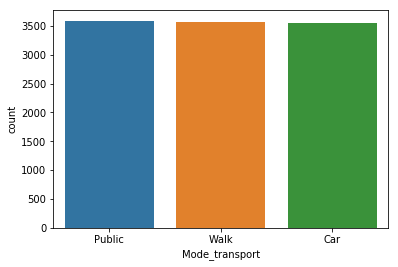

In [28]:
sns.countplot(x='Mode_transport', data=df_train)

since public transport is the mode of the class, we fill 3 empty cells with Public

In [29]:
df_train['Mode_transport'] = df_train.Mode_transport.fillna('Public')
df_train.Mode_transport.isna().sum()

0

### Imputing feature comorbidity

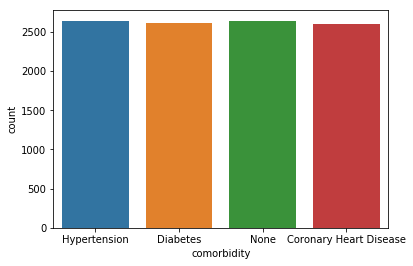

In [30]:
sns.countplot(x='comorbidity', data=df_train)

In [31]:
# sns.catplot(x="comorbidity", y='salary', hue="Gender", kind='swarm', data=df_train)

Unknown comorbidity means that they didn't know about their illness. Replacing with None

In [32]:
df_train['comorbidity'] = df_train.comorbidity.fillna('None')
df_train.comorbidity.isna().sum()

0

### Imputing feature 'cardiological-pressure'

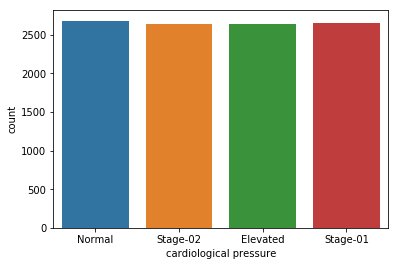

In [33]:
sns.countplot(x='cardiological pressure', data=df_train)

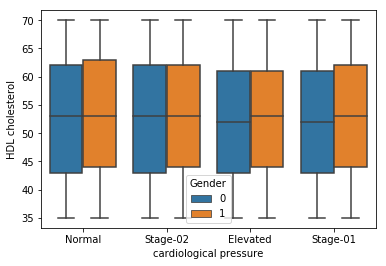

In [34]:
sns.boxplot(x='cardiological pressure', y='HDL cholesterol',hue='Gender', data=df_train)

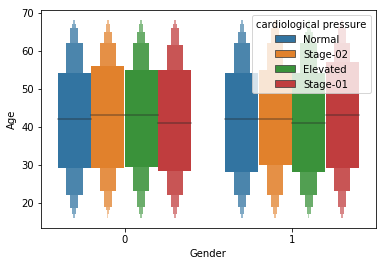

In [35]:
sns.boxenplot(x='Gender', y='Age',hue='cardiological pressure', data=df_train)

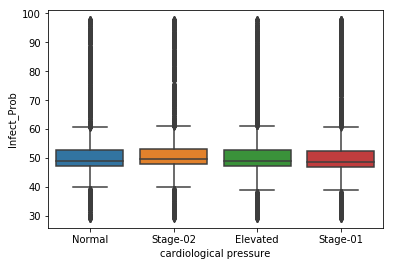

In [36]:
sns.boxplot(x='cardiological pressure', y='Infect_Prob', data=df_train)

It seems that all four comorbidity equally contribute to the infection probability. Replacing with Normal

In [37]:
df_train['cardiological pressure'] = df_train['cardiological pressure'].fillna('Normal')
df_train['cardiological pressure'].isna().sum()

0

### Imputing Diuresis, Platelets, HBB, d-dimer,	Heart rate,	HDL cholesterol


Since they are continuous values we will replace them by their mean

In [38]:
df_train['Diuresis'] = df_train['Diuresis'].fillna(df_train['Diuresis'].mean())
df_train['Diuresis'].isna().sum()

0

In [39]:
df_train['Platelets'] = df_train['Platelets'].fillna(df_train['Platelets'].mean())
df_train['Platelets'].isna().sum()

0

In [40]:
df_train['HBB'] = df_train['HBB'].fillna(df_train['HBB'].mean())
df_train['HBB'].isna().sum()

0

In [41]:
df_train['d-dimer'] = df_train['d-dimer'].fillna(df_train['d-dimer'].mean())
df_train['d-dimer'].isna().sum()

0

In [42]:
df_train['Heart rate'] = df_train['Heart rate'].fillna(df_train['Heart rate'].mean())
df_train['Heart rate'].isna().sum()

0

In [43]:
df_train['HDL cholesterol'] = df_train['HDL cholesterol'].fillna(df_train['HDL cholesterol'].mean())
df_train['HDL cholesterol'].isna().sum()

0

In [44]:
df_train.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,0,1,1.0,Farmer,Public,2,0,Hypertension,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,0,1,2.0,Farmer,Walk,2,0,Diabetes,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,0,0,1.0,Cleaner,Public,2,0,None,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,0,1,1.0,Driver,Car,2,0,Coronary Heart Disease,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,0,0,2.0,Manufacturing,Car,2,0,Diabetes,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


### Imputing Insurance

In [45]:
df_train[(df_train.Occupation.isna()) & (df_train.Insurance.isna())].count()

people_ID                 747
Region                    747
Gender                    747
Married                   747
Children                  747
Occupation                  0
Mode_transport            747
cases/1M                  747
Deaths/1M                 747
comorbidity               747
Age                       747
Coma score                747
Pulmonary score           747
cardiological pressure    747
Diuresis                  747
Platelets                 747
HBB                       747
d-dimer                   747
Heart rate                747
HDL cholesterol           747
Charlson Index            747
Blood Glucose             747
Insurance                   0
salary                    747
FT/month                  747
Infect_Prob               747
dtype: int64

In [46]:
df_train[~(df_train.Occupation.isna()) & (df_train.Insurance.isna())].count()

people_ID                 343
Region                    343
Gender                    343
Married                   343
Children                  343
Occupation                343
Mode_transport            343
cases/1M                  343
Deaths/1M                 343
comorbidity               343
Age                       343
Coma score                343
Pulmonary score           343
cardiological pressure    343
Diuresis                  343
Platelets                 343
HBB                       343
d-dimer                   343
Heart rate                343
HDL cholesterol           343
Charlson Index            343
Blood Glucose             343
Insurance                   0
salary                    343
FT/month                  308
Infect_Prob               343
dtype: int64

It seems that both occupation and insurance are not null at the same time. So, we can impute insurance with the mean of each ocuupation

In [47]:
means_ins = df_train.groupby('Occupation')['Insurance'].mean()
mean_ins = df_train.Insurance.mean()
print(mean_ins)
means_ins


2644918.9526184537


Occupation
Business         2.601575e+06
Cleaner          2.610214e+06
Clerk            2.680476e+06
Driver           2.641829e+06
Farmer           2.672123e+06
Legal            2.635996e+06
Manufacturing    2.650880e+06
Researcher       2.636440e+06
Sales            2.673285e+06
Name: Insurance, dtype: float64

In [48]:
means_ins['Cleaner']

2610213.556174559

In [49]:
def impute_insurance(cols):
    occ = cols[0]
    ins = cols[1]

    if pd.isnull(ins):
        if not pd.isnull(occ):
            ins = means_ins[str(occ)]
            return ins 
        else:
            return mean_ins
    else:
        return ins

    
df_train['Insurance'] = df_train[['Occupation', 'Insurance']].apply(impute_insurance, axis=1)
df_train.Insurance.isna().sum()

0

### Imputing feature FT/month

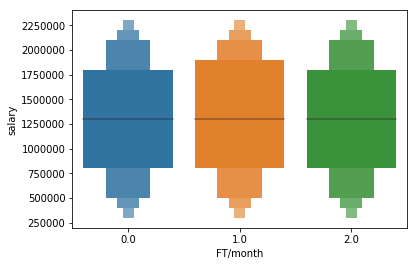

In [50]:
sns.boxenplot(x='FT/month', y='salary', data=df_train)

In [51]:
df_train['FT/month'] = df_train['FT/month'].fillna(df_train['FT/month'].median())
df_train['FT/month'].isna().sum()

0

imputings are done Lets vizualize correlation and do hypothesis testing

## Categorical encoding
encoding region, occupation, mode_transport, comorbidity

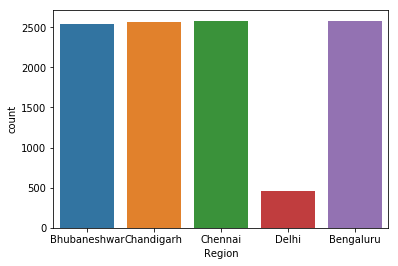

In [52]:
sns.countplot(x='Region', data=df_train)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Region']= le.fit_transform(df_train['Region'])
# df_train['Occupation']= le.fit_transform(df_train['Occupation'])
df_train['Mode_transport']= le.fit_transform(df_train['Mode_transport'])
df_train['comorbidity']= le.fit_transform(df_train['comorbidity'])

df_train.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,1,0,1,1.0,Farmer,1,2,0,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,1,0,1,2.0,Farmer,2,2,0,1,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,1,0,0,1.0,Cleaner,1,2,0,3,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,1,1.0,Driver,0,2,0,0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,2.0,Manufacturing,0,2,0,1,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


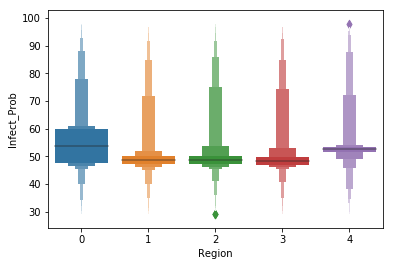

In [54]:
sns.boxenplot(x='Region', y='Infect_Prob', data=df_train)

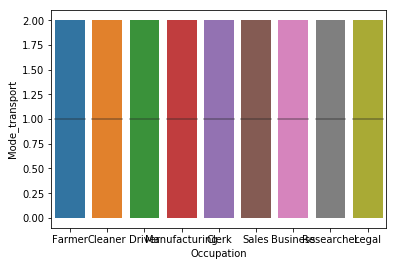

In [55]:
sns.boxenplot(x='Occupation', y='Mode_transport', data=df_train)

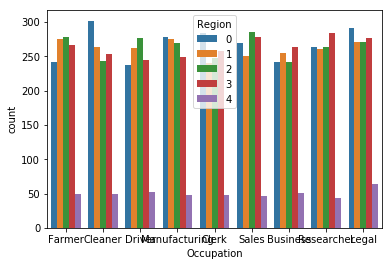

In [56]:
sns.countplot(x='Occupation', hue='Region', data=df_train)

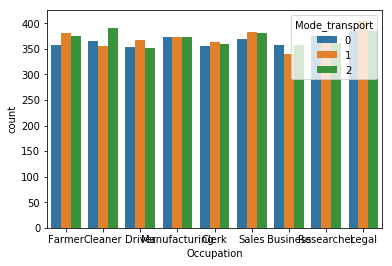

In [57]:
sns.countplot(x='Occupation', hue='Mode_transport', data=df_train)

In [58]:
# sns.pairplot(df_train)

In [59]:
# for i, col in enumerate(df_train.columns):
#     if not col in ['Occupation', 'people_ID','Pulmonary score','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose', 'Infect_Prob']:
#         plt.figure(i)
#         sns.countplot(x=col, hue='Occupation', data=df_train)

Dropping Occupation column

In [60]:
df_train = df_train.drop(['Occupation'], axis=1)
df_train.head()

,people_ID,Region,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,1,0,1,1.0,1,2,0,2,68,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,1,0,1,2.0,2,2,0,1,64,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,1,0,0,1.0,1,2,0,3,19,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,1,1.0,0,2,0,0,33,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,2.0,0,2,0,1,23,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


Processing pulmonary score

In [61]:
df_train['Pulmonary score'] = df_train['Pulmonary score'].str.replace('<', '')
df_train['Pulmonary score'].head()

0    400
1    100
2    300
3    200
4    400
Name: Pulmonary score, dtype: object

In [62]:
df_train.head()

,people_ID,Region,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,1,0,1,1.0,1,2,0,2,68,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,1,0,1,2.0,2,2,0,1,64,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,1,0,0,1.0,1,2,0,3,19,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,1,1.0,0,2,0,0,33,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,2.0,0,2,0,1,23,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


Since Region has high collinearity with cases/1M and Deaths/1M and cases and death is too linearly related (conclusion drawn from paiwise plot), we will drop Region and Deaths/1M

In [63]:
df_train.drop(['Region', 'Deaths/1M'],axis=1, inplace=True)

In [64]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Mode_transport'], prefix='Mode_transport')],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['comorbidity'], prefix='comorbidity')],axis=1)
df_train.drop(['Mode_transport', 'comorbidity'],axis=1, inplace=True)
df_train.head()

,people_ID,Gender,Married,Children,cases/1M,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,...,salary,FT/month,Infect_Prob,Mode_transport_0,Mode_transport_1,Mode_transport_2,comorbidity_0,comorbidity_1,comorbidity_2,comorbidity_3
0,1,0,1,1.0,2,68,8,400,Normal,441.000000,...,1300000,2.0,49.135010,0,1,0,0,0,1,0
1,2,0,1,2.0,2,64,15,100,Stage-02,278.806261,...,400000,1.0,51.147880,0,0,1,0,1,0,0
2,3,0,0,1.0,2,19,13,300,Elevated,416.000000,...,900000,1.0,73.224000,0,1,0,0,0,0,1
3,4,0,1,1.0,2,33,9,200,Stage-01,410.000000,...,2300000,1.0,48.779225,1,0,0,1,0,0,0
4,5,0,0,2.0,2,23,7,400,Normal,390.000000,...,1100000,1.0,87.868800,1,0,0,0,1,0,0


In [65]:
col_list = df_train.columns
col_list = ['people_ID','Mode_transport_0','Mode_transport_1','Mode_transport_2', 'Gender', 'Married', 'Children',
       'cases/1M','comorbidity_0','comorbidity_1','comorbidity_2','comorbidity_3', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Infect_Prob']
df_train = df_train[col_list]
df_train.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,0,1,0,0,1,1.0,2,0,0,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,0,0,1,0,1,2.0,2,0,1,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,0,1,0,0,0,1.0,2,0,0,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,0,0,1,1.0,2,1,0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,0,0,2.0,2,0,1,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [66]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['cardiological pressure'], prefix='cardiological pressure')],axis=1)
df_train.drop(['cardiological pressure'],axis=1, inplace=True)
df_train.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1,0,1,0,0,1,1.0,2,0,0,...,27,7,3600000.0,1300000,2.0,49.135010,0,1,0,0
1,2,0,0,1,0,1,2.0,2,0,1,...,5,6,1600000.0,400000,1.0,51.147880,0,0,0,1
2,3,0,1,0,0,0,1.0,2,0,0,...,40,6,3400000.0,900000,1.0,73.224000,1,0,0,0
3,4,1,0,0,0,1,1.0,2,1,0,...,27,7,700000.0,2300000,1.0,48.779225,0,0,1,0
4,5,1,0,0,0,0,2.0,2,0,1,...,32,7,3200000.0,1100000,1.0,87.868800,0,1,0,0


In [67]:
col_list = df_train.columns
col_list = ['people_ID','Mode_transport_0','Mode_transport_1','Mode_transport_2', 'Gender', 'Married', 'Children',
       'cases/1M','comorbidity_0','comorbidity_1','comorbidity_2','comorbidity_3', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure_Elevated','cardiological pressure_Normal','cardiological pressure_Stage-01',
       'cardiological pressure_Stage-02', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Infect_Prob']
df_train = df_train[col_list]
df_train.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,0,1,0,0,1,1.0,2,0,0,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,0,0,1,0,1,2.0,2,0,1,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,0,1,0,0,0,1.0,2,0,0,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,1,0,0,0,1,1.0,2,1,0,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,1,0,0,0,0,2.0,2,0,1,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


### Normalizing or Standardizing the features

In [68]:
from sklearn.preprocessing import MinMaxScaler
column_names_to_normalize = ['Age','Coma score', 'Pulmonary score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary']
x = df_train[column_names_to_normalize].values
min_max_scaler=MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_train.index)
df_train[column_names_to_normalize] = df_temp

df_train.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,0,1,0,0,1,1.0,2,0,0,...,0.384211,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,2.0,49.135010
1,2,0,0,1,0,1,2.0,2,0,1,...,0.189474,0.853333,0.78,0.942857,0.125,0.75,0.276596,0.05,1.0,51.147880
2,3,0,1,0,0,0,1.0,2,0,0,...,0.615789,0.086667,0.54,0.228571,1.000,0.75,0.659574,0.30,1.0,73.224000
3,4,1,0,0,0,1,1.0,2,1,0,...,0.773684,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,1.0,48.779225
4,5,1,0,0,0,0,2.0,2,0,1,...,0.700000,0.873333,0.42,0.828571,0.800,1.00,0.617021,0.40,1.0,87.868800


## Benchmark Model

In [69]:
df_train['Target_norm'] = df_train["Infect_Prob"]/100.0
df_train.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Target_norm
0,1,0,1,0,0,1,1.0,2,0,0,...,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,2.0,49.135010,0.491350
1,2,0,0,1,0,1,2.0,2,0,1,...,0.853333,0.78,0.942857,0.125,0.75,0.276596,0.05,1.0,51.147880,0.511479
2,3,0,1,0,0,0,1.0,2,0,0,...,0.086667,0.54,0.228571,1.000,0.75,0.659574,0.30,1.0,73.224000,0.732240
3,4,1,0,0,0,1,1.0,2,1,0,...,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,1.0,48.779225,0.487792
4,5,1,0,0,0,0,2.0,2,0,1,...,0.873333,0.42,0.828571,0.800,1.00,0.617021,0.40,1.0,87.868800,0.878688


In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

In [119]:
X = df_train.iloc[:, 1:-2]
Y = df_train.iloc[:, -2]
Y_norm = df_train.iloc[:, -1]
Y.count()

10714

In [120]:
X.head()

,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,comorbidity_2,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0,1,0,0,1,1.0,2,0,0,1,...,0.958621,0.384211,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,2.0
1,0,0,1,0,1,2.0,2,0,1,0,...,0.731034,0.189474,0.853333,0.78,0.942857,0.125,0.75,0.276596,0.05,1.0
2,0,1,0,0,0,1.0,2,0,0,0,...,0.751724,0.615789,0.086667,0.54,0.228571,1.000,0.75,0.659574,0.30,1.0
3,1,0,0,0,1,1.0,2,1,0,0,...,0.572414,0.773684,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,1.0
4,1,0,0,0,0,2.0,2,0,1,0,...,0.041379,0.700000,0.873333,0.42,0.828571,0.800,1.00,0.617021,0.40,1.0


In [72]:
Y_norm.dtype

dtype('float64')

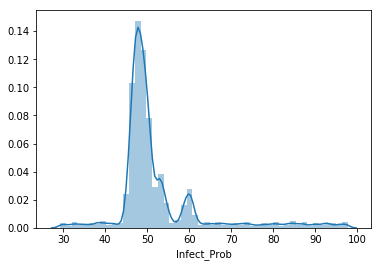

In [73]:
sns.distplot(Y)

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.02, random_state = 42)

In [148]:
X_train, X_test, Y_n_train, Y_n_test = train_test_split(X, Y_norm, test_size = 0.02, random_state = 42)

In [76]:
rf = RandomForestRegressor(criterion='mse', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, Y_n_train)
print("%.4f" % rf.oob_score_)

0.3268


In [77]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,variable,importance
11,Age,0.307890
5,Children,0.064160
6,cases/1M,0.063982
20,HBB,0.058268
19,Platelets,0.058114
18,Diuresis,0.055373
21,d-dimer,0.053835
24,Charlson Index,0.049603
23,HDL cholesterol,0.046366
22,Heart rate,0.043241


In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.2577908008352412

In [80]:
import statsmodels.api as sm
X_opt = X.iloc[:,:]
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Infect_Prob   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:44:15   Log-Likelihood:                -38797.
No. Observations:               10714   AIC:                         7.765e+04
Df Residuals:                   10687   BIC:                         7.785e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Mode_transport_0                   22.3189      0.397     56.154      0.000      21.540      23.098
Mode_transport_1                   22.4952      0.402     55.994      0.000      21.708      23.283
Mode_transport_2                   22.3190      0.399     55.962      0.000      21.537      23.101
Gender                             -0.1606      0.175     -0.917      0.359      -0.504       0.183
Married                           -12.0929      0.304    -39.759      0.000     -12.689     -11.497
Children                            2.0907      0.107     19.591      0.000       1.882       2.300
cases/1M                            0.6838      0.032     21.235      0.000       0.621       0.747
comorbidity_0                      16.7925      0.325     51.697      0.000      16.156      17.429
comorbidity_1                      16.7426      0.323     51.762      0.000      16.109      17.377
comorbidity_2                      16.8652      0.323     52.272      0.000      16.233      17.498
comorbidity_3                      16.7328      0.320     52.303      0.000      16.106      17.360
Age                                -0.3568      0.420     -0.849      0.396      -1.180       0.467
Coma score                          1.2857      0.283      4.542      0.000       0.731       1.841
Pulmonary score                    -0.8451      1.492     -0.566      0.571      -3.771       2.080
cardiological pressure_Elevated    16.8510      0.534     31.567      0.000      15.805      17.897
cardiological pressure_Normal      17.0871      0.981     17.410      0.000      15.163      19.011
cardiological pressure_Stage-01    16.5559      0.229     72.395      0.000      16.108      17.004
cardiological pressure_Stage-02    16.6390      0.561     29.668      0.000      15.540      17.738
Diuresis                            0.2258      0.315      0.717      0.473      -0.391       0.843
Platelets                           2.3661      0.318      7.450      0.000       1.744       2.989
HBB                                 0.8261      0.302      2.737      0.006       0.235       1.418
d-dimer                             0.5938      0.318      1.869      0.062      -0.029       1.217
Heart rate                         -0.2351      0.311     -0.756      0.450      -0.845       0.375
HDL cholesterol                     0.5572      0.294      1.893      0.058      -0.020       1.134
Charlson Index                     -0.2517      0.296     -0.850      0.395      -0.832       0.329
Blood Glucose                      -0.3371      0.250     -1.346      0.178      -0.828       0.154
Insurance                           0.0114      0.314      0.036      0.971      -0.604       0.627
salary                             -0.7085      0.288     -2.457      0.014      -1

Implementing XG_Boost

In [177]:
X_train = df_train.iloc[:,1:-2]
X_train.head()

,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,comorbidity_2,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0,1,0,0,1,1.0,2,0,0,1,...,0.958621,0.384211,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,2.0
1,0,0,1,0,1,2.0,2,0,1,0,...,0.731034,0.189474,0.853333,0.78,0.942857,0.125,0.75,0.276596,0.05,1.0
2,0,1,0,0,0,1.0,2,0,0,0,...,0.751724,0.615789,0.086667,0.54,0.228571,1.000,0.75,0.659574,0.30,1.0
3,1,0,0,0,1,1.0,2,1,0,0,...,0.572414,0.773684,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,1.0
4,1,0,0,0,0,2.0,2,0,1,0,...,0.041379,0.700000,0.873333,0.42,0.828571,0.800,1.00,0.617021,0.40,1.0


In [155]:
Y_n_train = df_train.iloc[:,-1]
Y_n_train.head()

0    0.491350
1    0.511479
2    0.732240
3    0.487792
4    0.878688
Name: Target_norm, dtype: float64

In [156]:
import xgboost
from sklearn.model_selection import GridSearchCV

# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.02, gamma=0, subsample=0.75,alpha=10,
                           colsample_bytree=0.3, max_depth=100)


In [157]:
xgb.fit(X_train,Y_n_train,eval_metric='rmsle')

XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
             validate_parameters=False, verbosity=None)

In [158]:
from sklearn.metrics import mean_squared_error
predictions = xgb.predict(X_test)
mse = mean_squared_error(predictions,Y_n_test)
print(np.sqrt(mse))

0.10242523395138377


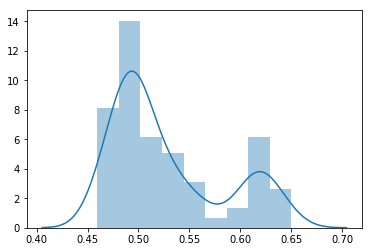

In [159]:
sns.distplot(predictions)

# prediction time 

In [160]:
df_test = pd.read_excel('../input/flipr-hiring-challenge/Test_dataset.xlsx')
df_test.head(14)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1
5,18749,Delhi,Male,Mr,diwan chand,YES,2,Sales,Walk,4,...,35,185,291,75,61,26,6,3400000,1700000,1
6,5228,Delhi,Female,Mrs,sunita,YES,2,Driver,Car,4,...,82,152,246,75,42,5,3,3500000,1000000,2
7,5559,Delhi,Female,Mrs,gaytri,YES,2,Manufacturing,Walk,4,...,117,112,343,68,54,24,3,3500000,400000,1
8,5220,Delhi,Female,Mrs,ritu,YES,2,Researcher,Public,4,...,89,107,224,80,53,5,6,1800000,1600000,2
9,5476,Delhi,Female,Mrs,poonam,YES,2,Researcher,Public,4,...,57,146,303,81,48,31,7,500000,800000,1


In [161]:
df_test.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
count,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,14498.000000,1.449800e+04,1.449800e+04,14498.000000
mean,14469.963167,0.978963,5.886743,1.342737,42.083667,8.985860,280.657608,86.886467,114.082977,274.667264,75.021727,52.417920,19.997448,4.995724,2.654849e+06,1.300021e+06,1.002966
std,6826.922260,0.811833,4.651725,0.953566,15.326426,3.754762,98.240677,42.194450,55.207974,43.706160,14.549680,10.341219,11.887840,1.416303,1.375384e+06,6.055975e+05,0.818952
min,3887.000000,0.000000,0.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000
25%,7747.250000,0.000000,3.000000,1.000000,29.000000,6.000000,195.000000,51.000000,66.000000,237.000000,63.000000,43.000000,10.000000,4.000000,1.500000e+06,8.000000e+05,0.000000
50%,16467.500000,1.000000,4.000000,1.000000,42.000000,9.000000,280.000000,87.000000,113.000000,274.000000,75.000000,52.000000,20.000000,5.000000,2.700000e+06,1.300000e+06,1.000000
75%,20315.750000,2.000000,11.000000,2.000000,55.000000,12.000000,366.000000,124.000000,162.000000,312.000000,88.000000,61.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000
max,25212.000000,2.000000,13.000000,3.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000


In [162]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 27 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null object
Gender                    14498 non-null object
Designation               14498 non-null object
Name                      14466 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non

In [163]:
df_test.isna().sum()

people_ID                  0
Region                     0
Gender                     0
Designation                0
Name                      32
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Age                        0
Coma score                 0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
salary                     0
FT/month                   0
dtype: int64

In [164]:
for col in df_test.columns:
    print("col-name: ", col, " | no_of_unique_values: ", df_test[col].nunique(dropna=True))

col-name:  people_ID  | no_of_unique_values:  14498
col-name:  Region  | no_of_unique_values:  6
col-name:  Gender  | no_of_unique_values:  2
col-name:  Designation  | no_of_unique_values:  2
col-name:  Name  | no_of_unique_values:  8047
col-name:  Married  | no_of_unique_values:  2
col-name:  Children  | no_of_unique_values:  3
col-name:  Occupation  | no_of_unique_values:  9
col-name:  Mode_transport  | no_of_unique_values:  3
col-name:  cases/1M  | no_of_unique_values:  5
col-name:  Deaths/1M  | no_of_unique_values:  4
col-name:  comorbidity  | no_of_unique_values:  4
col-name:  Age  | no_of_unique_values:  53
col-name:  Coma score  | no_of_unique_values:  13
col-name:  Pulmonary score  | no_of_unique_values:  4
col-name:  cardiological pressure  | no_of_unique_values:  4
col-name:  Diuresis  | no_of_unique_values:  341
col-name:  Platelets  | no_of_unique_values:  146
col-name:  HBB  | no_of_unique_values:  191
col-name:  d-dimer  | no_of_unique_values:  151
col-name:  Heart rate  

In [165]:
df_test = df_test.drop(['Designation', 'Name'], axis = 1)
df_test.head(10)

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,YES,2,Driver,Public,4,1,Diabetes,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,YES,2,Legal,Walk,4,1,Diabetes,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,YES,2,Sales,Car,4,1,Diabetes,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,YES,2,Sales,Car,4,1,None,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,YES,2,Business,Car,4,1,Diabetes,...,109,207,312,94,68,39,5,2300000,1500000,1
5,18749,Delhi,Male,YES,2,Sales,Walk,4,1,Diabetes,...,35,185,291,75,61,26,6,3400000,1700000,1
6,5228,Delhi,Female,YES,2,Driver,Car,4,1,None,...,82,152,246,75,42,5,3,3500000,1000000,2
7,5559,Delhi,Female,YES,2,Manufacturing,Walk,4,1,None,...,117,112,343,68,54,24,3,3500000,400000,1
8,5220,Delhi,Female,YES,2,Researcher,Public,4,1,Hypertension,...,89,107,224,80,53,5,6,1800000,1600000,2
9,5476,Delhi,Female,YES,2,Researcher,Public,4,1,Hypertension,...,57,146,303,81,48,31,7,500000,800000,1


In [166]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

lb = LabelBinarizer()
df_test['Gender'] = lb.fit_transform(df_test.Gender)
df_test['Married'] = lb.fit_transform(df_test.Married)

df_test.head(5)

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,0,1,2,Driver,Public,4,1,Diabetes,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,1,1,2,Legal,Walk,4,1,Diabetes,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,0,1,2,Sales,Car,4,1,Diabetes,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,0,1,2,Sales,Car,4,1,None,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,0,1,2,Business,Car,4,1,Diabetes,...,109,207,312,94,68,39,5,2300000,1500000,1


In [167]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_test['Region']= le.fit_transform(df_test['Region'])
# df_train['Occupation']= le.fit_transform(df_train['Occupation'])
df_test['Mode_transport']= le.fit_transform(df_test['Mode_transport'])
df_test['comorbidity']= le.fit_transform(df_test['comorbidity'])

df_test.head()

,people_ID,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,0,1,2,Driver,1,4,1,1,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,0,1,1,2,Legal,2,4,1,1,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,0,0,1,2,Sales,0,4,1,1,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,0,0,1,2,Sales,0,4,1,3,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,0,0,1,2,Business,0,4,1,1,...,109,207,312,94,68,39,5,2300000,1500000,1


In [168]:
df_test = df_test.drop(['Occupation'], axis=1)
df_test.head()

,people_ID,Region,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,0,1,2,1,4,1,1,52,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,0,1,1,2,2,4,1,1,53,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,0,0,1,2,0,4,1,1,35,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,0,0,1,2,0,4,1,3,31,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,0,0,1,2,0,4,1,1,51,...,109,207,312,94,68,39,5,2300000,1500000,1


In [169]:
df_test['Pulmonary score'] = df_test['Pulmonary score'].str.replace('<', '')
df_test['Pulmonary score'].head()

0    200
1    200
2    100
3    300
4    200
Name: Pulmonary score, dtype: object

In [170]:
df_test.drop(['Region', 'Deaths/1M'],axis=1, inplace=True)

In [171]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['Mode_transport'], prefix='Mode_transport')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['comorbidity'], prefix='comorbidity')],axis=1)
df_test.drop(['Mode_transport', 'comorbidity'],axis=1, inplace=True)
df_test.head()

,people_ID,Gender,Married,Children,cases/1M,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,...,Insurance,salary,FT/month,Mode_transport_0,Mode_transport_1,Mode_transport_2,comorbidity_0,comorbidity_1,comorbidity_2,comorbidity_3
0,5942,0,1,2,4,52,3,200,Stage-01,388,...,3900000,1300000,1,0,1,0,0,1,0,0
1,18664,1,1,2,4,53,11,200,Stage-01,409,...,1800000,1300000,1,0,0,1,0,1,0,0
2,5603,0,1,2,4,35,9,100,Stage-02,440,...,5000000,2000000,2,1,0,0,0,1,0,0
3,5649,0,1,2,4,31,12,300,Elevated,206,...,3100000,600000,2,1,0,0,0,0,0,1
4,5099,0,1,2,4,51,6,200,Stage-01,229,...,2300000,1500000,1,1,0,0,0,1,0,0


In [172]:
col_list = df_test.columns
col_list = ['people_ID','Mode_transport_0','Mode_transport_1','Mode_transport_2', 'Gender', 'Married', 'Children',
       'cases/1M','comorbidity_0','comorbidity_1','comorbidity_2','comorbidity_3', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month']
df_test = df_test[col_list]
df_test.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,1,0,0,1,2,4,0,1,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,0,0,1,1,1,2,4,0,1,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,1,0,0,0,1,2,4,0,1,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,1,0,0,0,1,2,4,0,0,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,1,0,0,0,1,2,4,0,1,...,109,207,312,94,68,39,5,2300000,1500000,1


In [173]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['cardiological pressure'], prefix='cardiological pressure')],axis=1)
df_test.drop(['cardiological pressure'],axis=1, inplace=True)
df_test.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,5942,0,1,0,0,1,2,4,0,1,...,53,17,3,3900000,1300000,1,0,0,1,0
1,18664,0,0,1,1,1,2,4,0,1,...,61,2,5,1800000,1300000,1,0,0,1,0
2,5603,1,0,0,0,1,2,4,0,1,...,47,24,3,5000000,2000000,2,0,0,0,1
3,5649,1,0,0,0,1,2,4,0,0,...,52,13,6,3100000,600000,2,1,0,0,0
4,5099,1,0,0,0,1,2,4,0,1,...,68,39,5,2300000,1500000,1,0,0,1,0


In [174]:
col_list = df_test.columns
col_list = ['people_ID','Mode_transport_0','Mode_transport_1','Mode_transport_2', 'Gender', 'Married', 'Children',
       'cases/1M','comorbidity_0','comorbidity_1','comorbidity_2','comorbidity_3', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure_Elevated','cardiological pressure_Normal','cardiological pressure_Stage-01',
       'cardiological pressure_Stage-02', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month']
df_test = df_test[col_list]
df_test.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,1,0,0,1,2,4,0,1,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,0,0,1,1,1,2,4,0,1,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,1,0,0,0,1,2,4,0,1,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,1,0,0,0,1,2,4,0,0,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,1,0,0,0,1,2,4,0,1,...,109,207,312,94,68,39,5,2300000,1500000,1


In [175]:
from sklearn.preprocessing import MinMaxScaler
column_names_to_normalize = ['Age','Coma score', 'Pulmonary score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary']
x = df_test[column_names_to_normalize].values
min_max_scaler=MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_test.index)
df_test[column_names_to_normalize] = df_temp

df_test.head()

,people_ID,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,0,1,0,0,1,2,4,0,1,...,0.951724,0.926316,0.266667,0.70,0.514286,0.425,0.00,0.765957,0.50,1
1,18664,0,0,1,1,1,2,4,0,1,...,0.551724,0.621053,0.273333,0.62,0.742857,0.050,0.50,0.319149,0.50,1
2,5603,1,0,0,0,1,2,4,0,1,...,0.172414,0.768421,0.240000,0.76,0.342857,0.600,0.00,1.000000,0.85,2
3,5649,1,0,0,0,1,2,4,0,0,...,0.434483,0.331579,0.073333,0.74,0.485714,0.325,0.75,0.595745,0.15,2
4,5099,1,0,0,0,1,2,4,0,1,...,0.648276,0.984211,0.746667,0.88,0.942857,0.975,0.50,0.425532,0.60,1


In [176]:
test = df_test.iloc[:,1:]
test.head()

,Mode_transport_0,Mode_transport_1,Mode_transport_2,Gender,Married,Children,cases/1M,comorbidity_0,comorbidity_1,comorbidity_2,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0,1,0,0,1,2,4,0,1,0,...,0.951724,0.926316,0.266667,0.70,0.514286,0.425,0.00,0.765957,0.50,1
1,0,0,1,1,1,2,4,0,1,0,...,0.551724,0.621053,0.273333,0.62,0.742857,0.050,0.50,0.319149,0.50,1
2,1,0,0,0,1,2,4,0,1,0,...,0.172414,0.768421,0.240000,0.76,0.342857,0.600,0.00,1.000000,0.85,2
3,1,0,0,0,1,2,4,0,0,0,...,0.434483,0.331579,0.073333,0.74,0.485714,0.325,0.75,0.595745,0.15,2
4,1,0,0,0,1,2,4,0,1,0,...,0.648276,0.984211,0.746667,0.88,0.942857,0.975,0.50,0.425532,0.60,1


In [178]:
pred = xgb.predict(test)

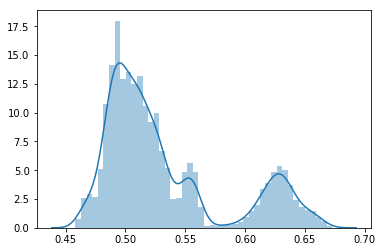

In [179]:
sns.distplot(pred)

In [186]:
submission = pd.read_excel('../input/flipr-hiring-challenge/Test_dataset.xlsx')
submission['infect_prob_20'] = pd.Series(pred)
submission.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,infect_prob_20
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,196,240,85,53,17,3,3900000,1300000,1,0.520547
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,138,241,81,61,2,5,1800000,1300000,1,0.526854
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,166,236,88,47,24,3,5000000,2000000,2,0.516035
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,83,211,87,52,13,6,3100000,600000,2,0.517307
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,207,312,94,68,39,5,2300000,1500000,1,0.522193


In [185]:
pd.DataFrame(submission, columns=['people_ID', 'infect_prob_20']).to_csv('submission.csv', index = False)
